# Naïve Bayes Classifier

## Import the necessary libraires

In [ ]:
import pandas as pd

import glob

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import numpy as np

## Read the data

In [ ]:
data = pd.read_csv('chirper.csv', encoding = "ISO-8859-1")
data.head()

,Target,IDS,Date,Flag,User,Text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
data['Target'].value_counts()

1    9500
0     500
Name: Target, dtype: int64

Enter the rest of the code below.

In [ ]:
inputs = data['Text']
target = data['Target']

In [ ]:
inputs

0       @switchfoot http://twitpic.com/2y1zl - Awww, t...
1       is upset that he can't update his Facebook by ...
2       @Kenichan I dived many times for the ball. Man...
3         my whole body feels itchy and like its on fire 
4       @nationwideclass no, it's not behaving at all....
                              ...                        
9995    @alexandramusic Morning Alexandra lol cant wai...
9996    @christinastrain When I get closer to finalize...
9997    @nashmeg http://i44.tinypic.com/j5fl34.jpg the...
9998    (and HR) have painstakingly made the huge sacr...
9999    Is going 2 Funderworld up on the Downs 2nite w...
Name: Text, Length: 10000, dtype: object

In [ ]:
#x_train, x_test, y_train, y_test = train_test_split(inputs_transf, target, test_size=0.2, random_state=365, stratify = target)

x_train, x_test, y_train, y_test = train_test_split(inputs, target,
                                                    test_size = 0.2,
                                                    train_size=0.8, 
                                                    random_state=365,
                                                    stratify = target)


In [ ]:
vectorizer = CountVectorizer()

x_train_transf = vectorizer.fit_transform(x_train)
x_test_transf = vectorizer.transform(x_test)



In [ ]:
clf = MultinomialNB()

clf.fit(x_train_transf, y_train)

MultinomialNB()

In [ ]:
y_test_pred = clf.predict(x_test_transf)

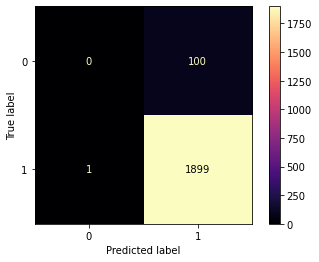

In [ ]:
sns.reset_orig()

ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred,
    labels = clf.classes_,
    cmap = 'magma'
);

In [ ]:
print(classification_report(y_test, y_test_pred, target_names = ['1','0']))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       100
           0       0.95      1.00      0.97      1900

    accuracy                           0.95      2000
   macro avg       0.47      0.50      0.49      2000
weighted avg       0.90      0.95      0.93      2000



In [ ]:
predict_data = vectorizer.transform(['Such feelings are not surprising, you are allowed to be crossed'])

In [ ]:
clf.predict(predict_data)

array([1])